# EHZ data analysis

In [36]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

EHZ_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'EHZ':
        EHZ_st.append(st[i]) 

In [43]:
EHZ_st

12 Trace(s) in Stream:
CN.EEO..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.CRLO..EHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.GRQ..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.OTT..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.GAC..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.WBO..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.TRQ..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.EFO..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.DPQ..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.MIV..EHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 3

In [37]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


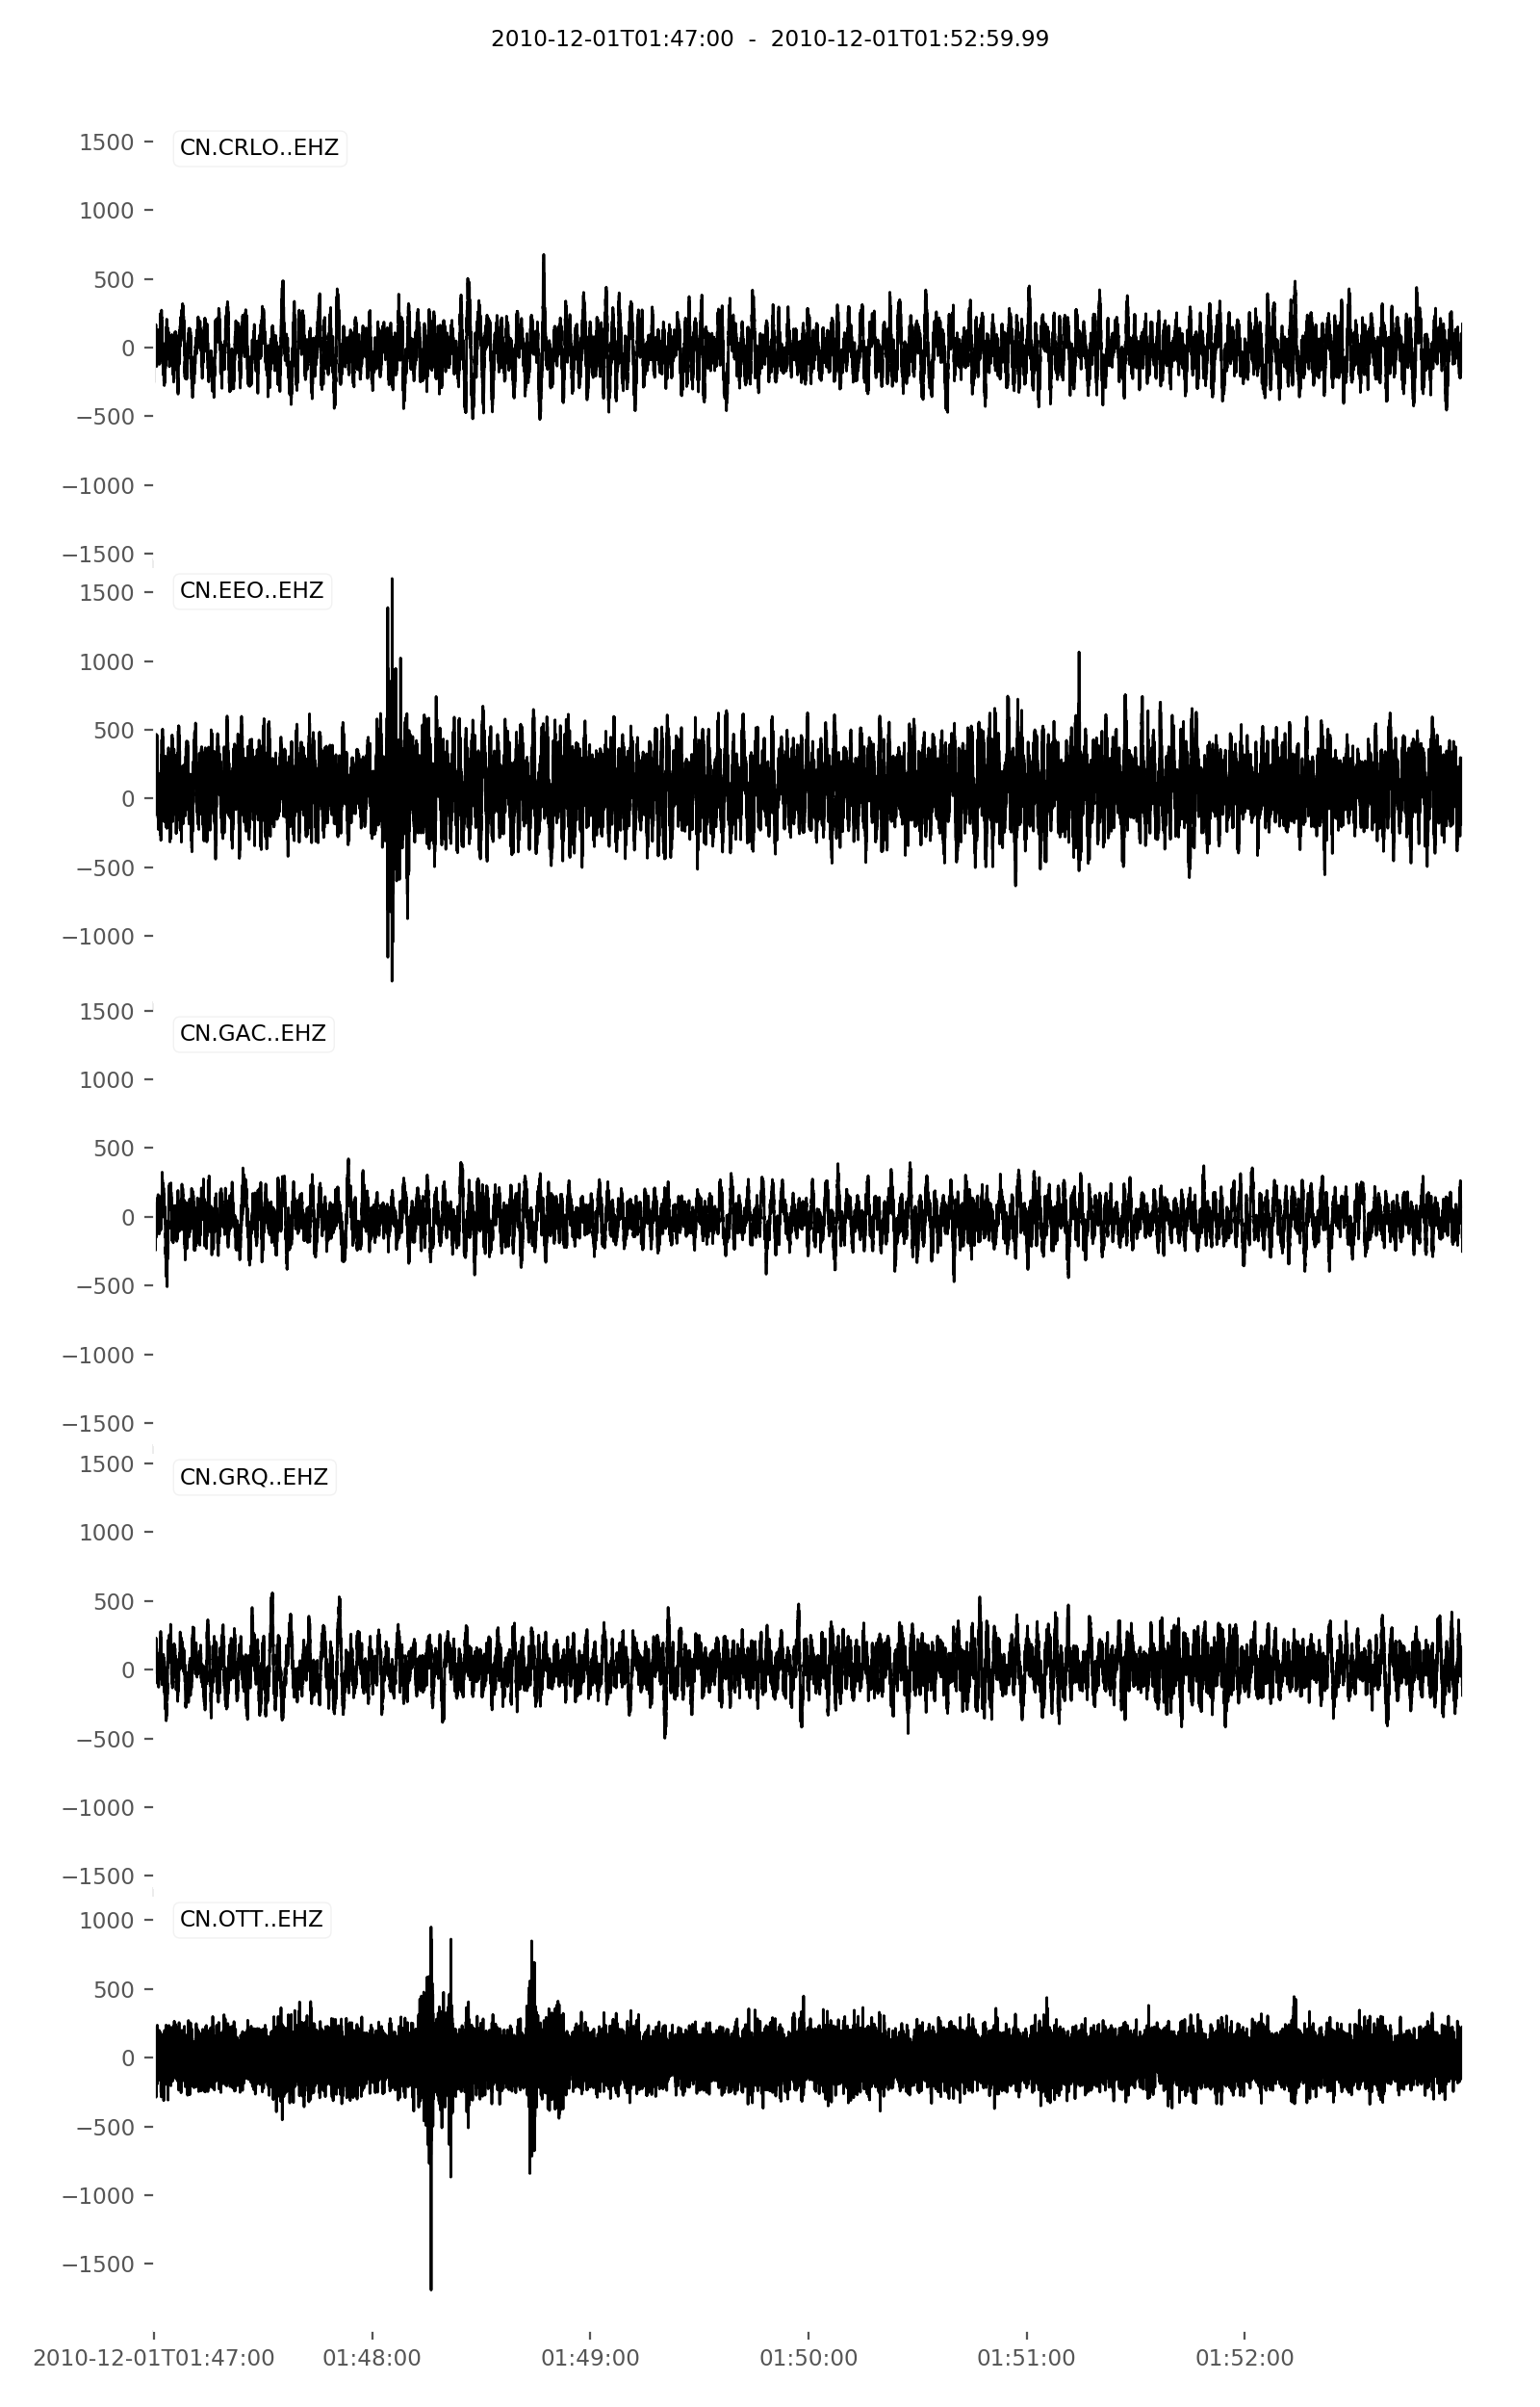

In [38]:
EHZ_st[:5].plot()

In [10]:
print("Station: ", [tr.stats['station'] for tr in EHZ_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in EHZ_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in EHZ_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in EHZ_st]))

Station:  ['EEO', 'CRLO', 'GRQ', 'OTT', 'GAC', 'WBO', 'TRQ', 'EFO', 'DPQ', 'MIV', 'MOQ', 'QCQ']
Sampling Rate:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
(delta, npts):  [(0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000)]
(start time, end time):  [[UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(

Every trace of band code 'E' have sampling rate of 100Hz. This can also be shown with the consistent delta value of 0.01. They were also taken during the same time interval (2010/12/1 1:47:00 - 1:52:59.99)

In [39]:
sp.stats.describe(EHZ_st[0].data)

DescribeResult(nobs=36000, minmax=(-1329, 1600), mean=83.942805555555552, variance=34950.871225218449, skewness=0.030466901610799554, kurtosis=0.47808325291300013)

In [40]:
np.std(EHZ_st[0].data)

186.9489244892423

In [41]:
EHZ_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in EHZ_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in EHZ_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
83.9428055556 		 186.948924489 		 (-1329, 1600)
-18.7317777778 		 146.361323447 		 (-524, 677)
17.9877777778 		 131.288131035 		 (-499, 557)
-5.34216666667 		 110.061099091 		 (-1690, 951)
-10.3388333333 		 118.224922747 		 (-508, 422)
-151.269027778 		 145.415091249 		 (-798, 498)
-86.16225 		 139.032023219 		 (-980, 759)
90.1270833333 		 597.244049773 		 (-1994, 2083)
-178.702555556 		 120.943394354 		 (-670, 286)
-14258.9633333 		 515674.735295 		 (-2031869, 1867645)
-112.59075 		 233.346905886 		 (-1125, 904)
-28.9583888889 		 1268.53736458 		 (-4719, 5496)


The mean value for all EHZ data are roughly normalized at 0, and the STD is usualy just above 100. It seems that the 9th data is an outliar. Let's see what it looks like.

<IPython.core.display.Javascript object>


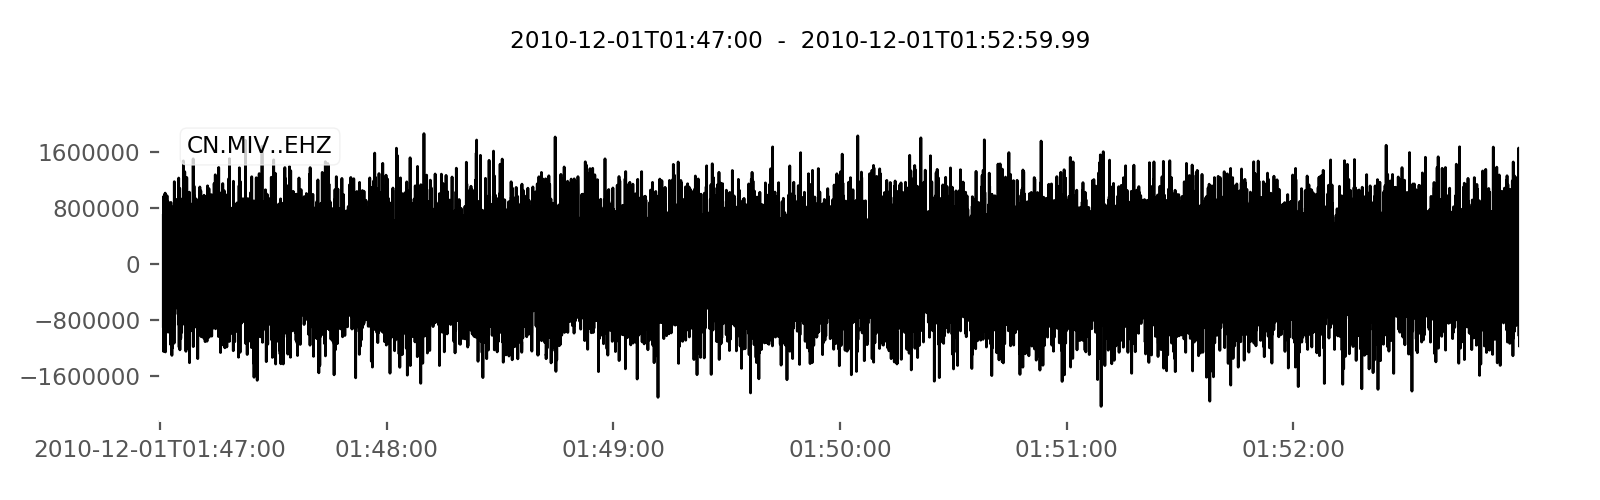

In [42]:
EHZ_st[9].plot()

Surprisingly, it actually doesn't look too different from other EHZ, other than the fact that the y-values are extremely big. I wonder what caused this for this specific data